In [1]:
import matplotlib.pyplot as plt

: 

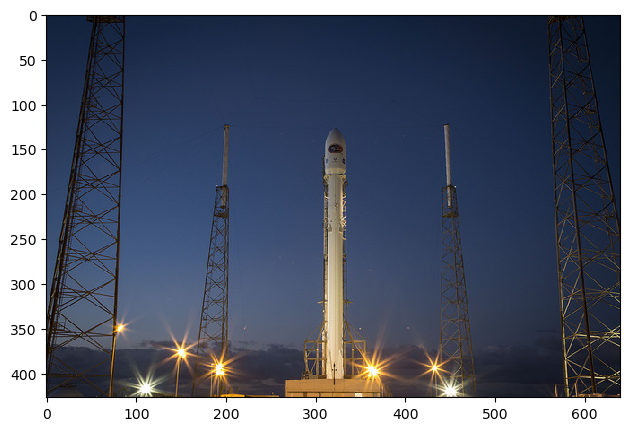

In [24]:
from skimage import data, io
rocket_image = data.rocket()
io.imshow(rocket_image)

In [3]:
def show_image(image, title='Image', cmap_type='gray'):
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('off')
  plt.show()

: 

In [18]:
def show_multiple_image(img1,img2,t1="image 1",t2="image 2"):
    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.title(t1)
    plt.subplot(1,2,2)
    plt.imshow(img2)
    plt.title(t2)

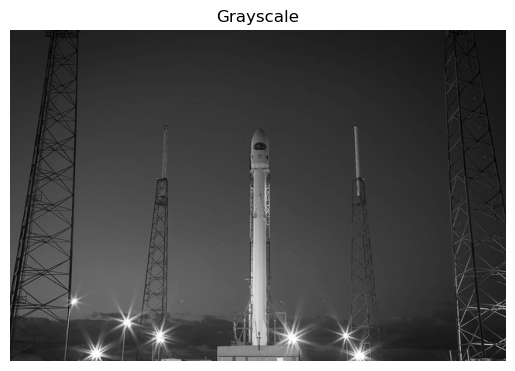

In [4]:
from skimage import color
grayscale = color.rgb2gray(rocket_image)
show_image(grayscale, "Grayscale")  

In [5]:
def plot_comparison(original, filtered, title_filtered):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title('original')
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(title_filtered)
  ax2.axis('off')

: 

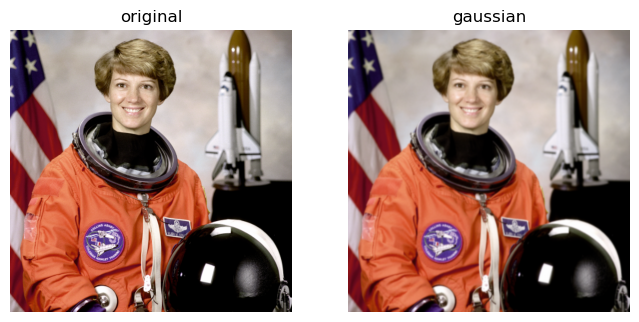

In [21]:
from skimage.filters import gaussian
astranot_image = data.astronaut()
g_image = gaussian(astranot_image)

plot_comparison(astranot_image,g_image,"gaussian")

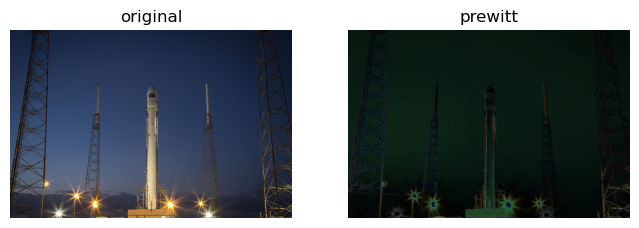

In [7]:
# from skimage.filters import prewitt
# p_image = prewitt(rocket_image)

# plot_comparison(rocket_image,p_image,"prewitt")

In [8]:
#https://github.com/abhilas0/edge_detection/blob/master/edge_detection.ipynb

: 

In [9]:
import numpy as np
def get_mask(image):
    ''' Creates mask with three defect regions '''
    mask = np.zeros(image.shape[:-1])

    mask[101:106, 0:240] = 1

    mask[152:154, 0:60] = 1
    mask[153:155, 60:100] = 1
    mask[154:156, 100:120] = 1
    mask[155:156, 120:140] = 1

    mask[212:217, 0:150] = 1
    mask[217:222, 150:256] = 1
    return mask


: 

/var/folders/y2/pbbl1rcd3kj9crfctyw4fgy80000gn/T/ipykernel_8459/2051840620.py:7: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  restored_image = inpaint.inpaint_biharmonic(defect_image,mask,multichannel=True)


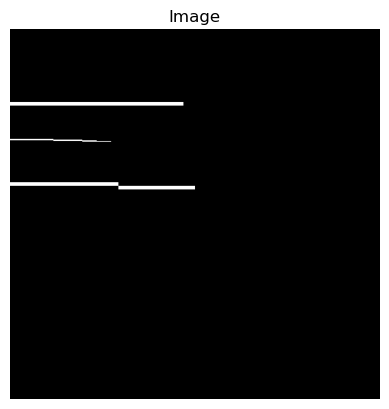

In [13]:
from skimage.restoration import inpaint

defect_image = data.astronaut()
# Obtain the mask
mask = get_mask(defect_image)

restored_image = inpaint.inpaint_biharmonic(defect_image,mask,multichannel=True)

# Show the resulting image
show_image(mask)

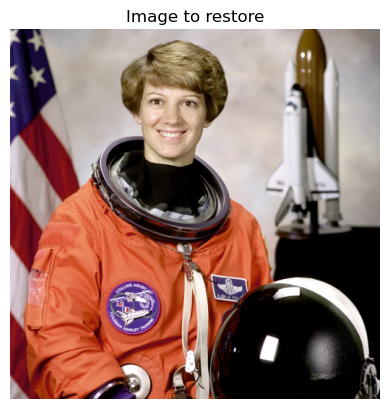

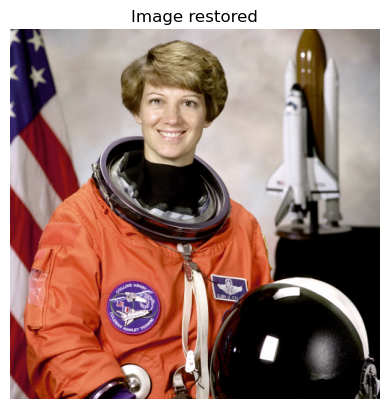

In [17]:
# Show the defect and resulting images
show_image(defect_image,'Image to restore')

show_image(restored_image,'Image restored')

# show_multiple_image(defect_image,restored_image);